In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# attribute information

1. variance of wavelet transformed image (continuous)
2. skewness of wavelet transformed image(continuous)
3. curtosis of wavelet Transformed image (continuous)
4. entropy of image(continuous)
5. target (integer)

In [3]:
df=pd.read_csv('IBM_HR_Attrition_Rate_Analytics.csv')
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,80,1,17,3,3,5,2,0,3,No
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,80,1,9,5,3,7,7,1,7,No
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,80,1,6,0,3,6,2,0,3,No
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,80,0,17,3,2,9,6,0,8,No


In [4]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


In [5]:
df.shape

(1470, 35)

In [6]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [7]:
df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [9]:
df2 = df.drop(columns=[
                        'Age',
                        'MonthlyIncome',
                        'YearsAtCompany',
                        'DistanceFromHome',
                        'PerformanceRating',
                        'NumCompaniesWorked'
                     ])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000267CFD46160>,
      dtype=object)

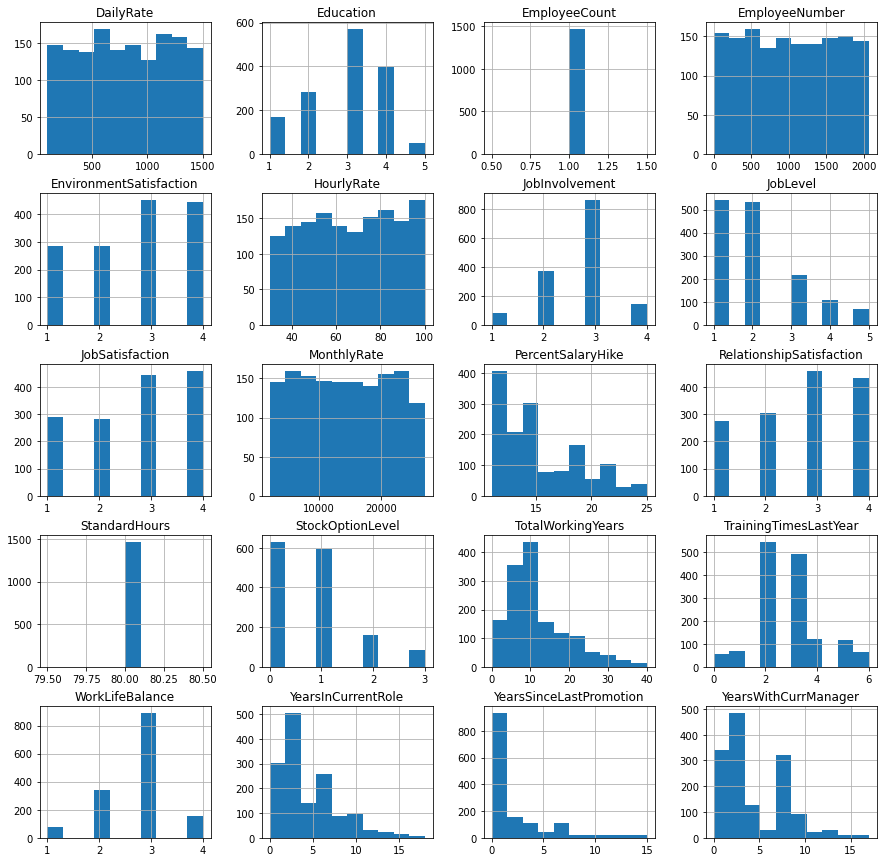

In [10]:
df2.hist(figsize=(15,15))

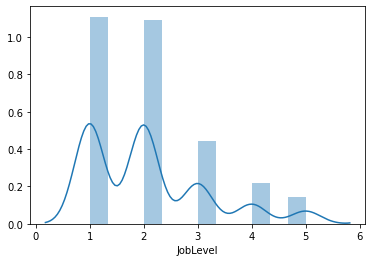

In [15]:
sns.distplot(df2['JobLevel'])

In [12]:
df2.columns

Index(['BusinessTravel', 'DailyRate', 'Department', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyRate', 'Over18', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition'],
      dtype='object')

In [13]:
df2.dtypes

BusinessTravel              object
DailyRate                    int64
Department                  object
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyRate                  int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Attrition           

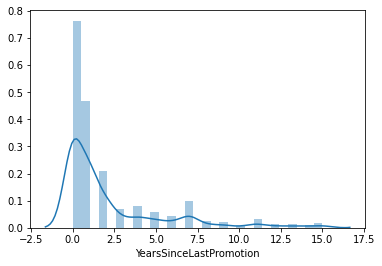

In [16]:
sns.distplot(df2['YearsSinceLastPromotion'])

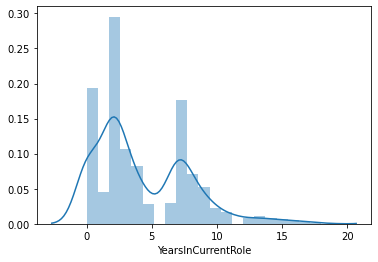

In [17]:
sns.distplot(df2['YearsInCurrentRole'])

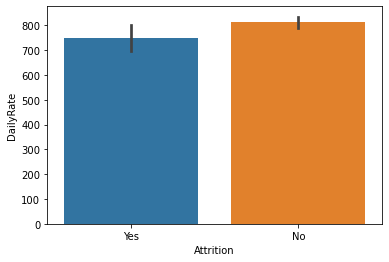

In [19]:
sns.barplot(x='Attrition',y='DailyRate', data=df2)

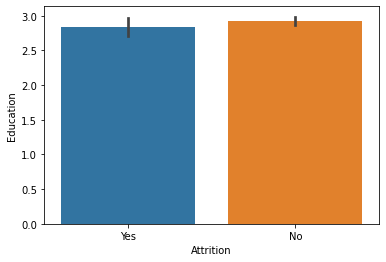

In [20]:
sns.barplot(x='Attrition',y='Education', data=df2)

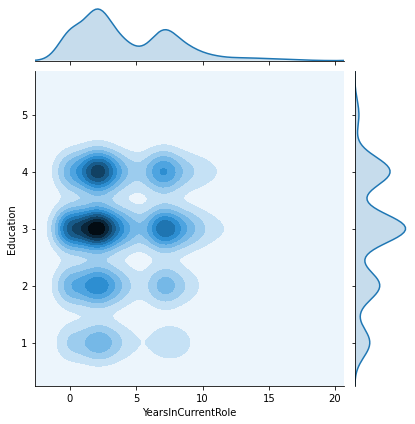

In [22]:
sns.jointplot(x='YearsInCurrentRole', y='Education', data=df2, kind='kde')# kde

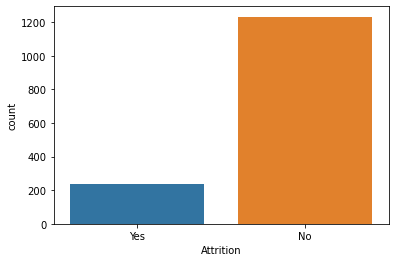

In [24]:
sns.countplot(x='Attrition',data=df2)

<Figure size 1296x720 with 0 Axes>

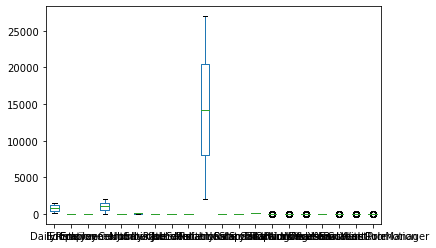

In [26]:
plt.figure(figsize=(18,10))
df2.plot.box()
sns.set_context('paper', font_scale=1.8)

In [45]:
import seaborn as sns
#sns.pairplot(df)

In [ ]:
#sns.pairplot(df,hue='Attrition')

In [17]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
df3= df2.apply(lambda x: x.fillna(x.value_counts().index[0]))
df3

,BusinessTravel,DailyRate,Department,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,Travel_Rarely,1102,Sales,2,Life Sciences,1,1,2,Female,94,...,1,80,0,8,0,1,4,0,5,Yes
1,Travel_Frequently,279,Research & Development,1,Life Sciences,1,2,3,Male,61,...,4,80,1,10,3,3,7,1,7,No
2,Travel_Rarely,1373,Research & Development,2,Other,1,4,4,Male,92,...,2,80,0,7,3,3,0,0,0,Yes
3,Travel_Frequently,1392,Research & Development,4,Life Sciences,1,5,4,Female,56,...,3,80,0,8,3,3,7,3,0,No
4,Travel_Rarely,591,Research & Development,1,Medical,1,7,1,Male,40,...,4,80,1,6,3,3,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,884,Research & Development,2,Medical,1,2061,3,Male,41,...,3,80,1,17,3,3,2,0,3,No
1466,Travel_Rarely,613,Research & Development,1,Medical,1,2062,4,Male,42,...,1,80,1,9,5,3,7,1,7,No
1467,Travel_Rarely,155,Research & Development,3,Life Sciences,1,2064,2,Male,87,...,2,80,1,6,0,3,2,0,3,No
1468,Travel_Frequently,1023,Sales,3,Medical,1,2065,4,Male,63,...,4,80,0,17,3,2,6,0,8,No


In [22]:
df3.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [23]:
df3.shape

(1470, 25)

In [24]:
df3.dtypes

BusinessTravel              object
DailyRate                    int64
Department                  object
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyRate                  int64
OverTime                    object
PercentSalaryHike            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Attrition                   object
dtype: object

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#df['city']=le.fit_transform(df['city'])

list1=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Attrition']
for val in list1:
    df3[val]=le.fit_transform(df3[val].astype(str))

In [44]:
df3.dtypes

BusinessTravel              int32
DailyRate                   int64
Department                  int32
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyRate                 int64
OverTime                    int32
PercentSalaryHike           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
Attrition                   int32
dtype: object

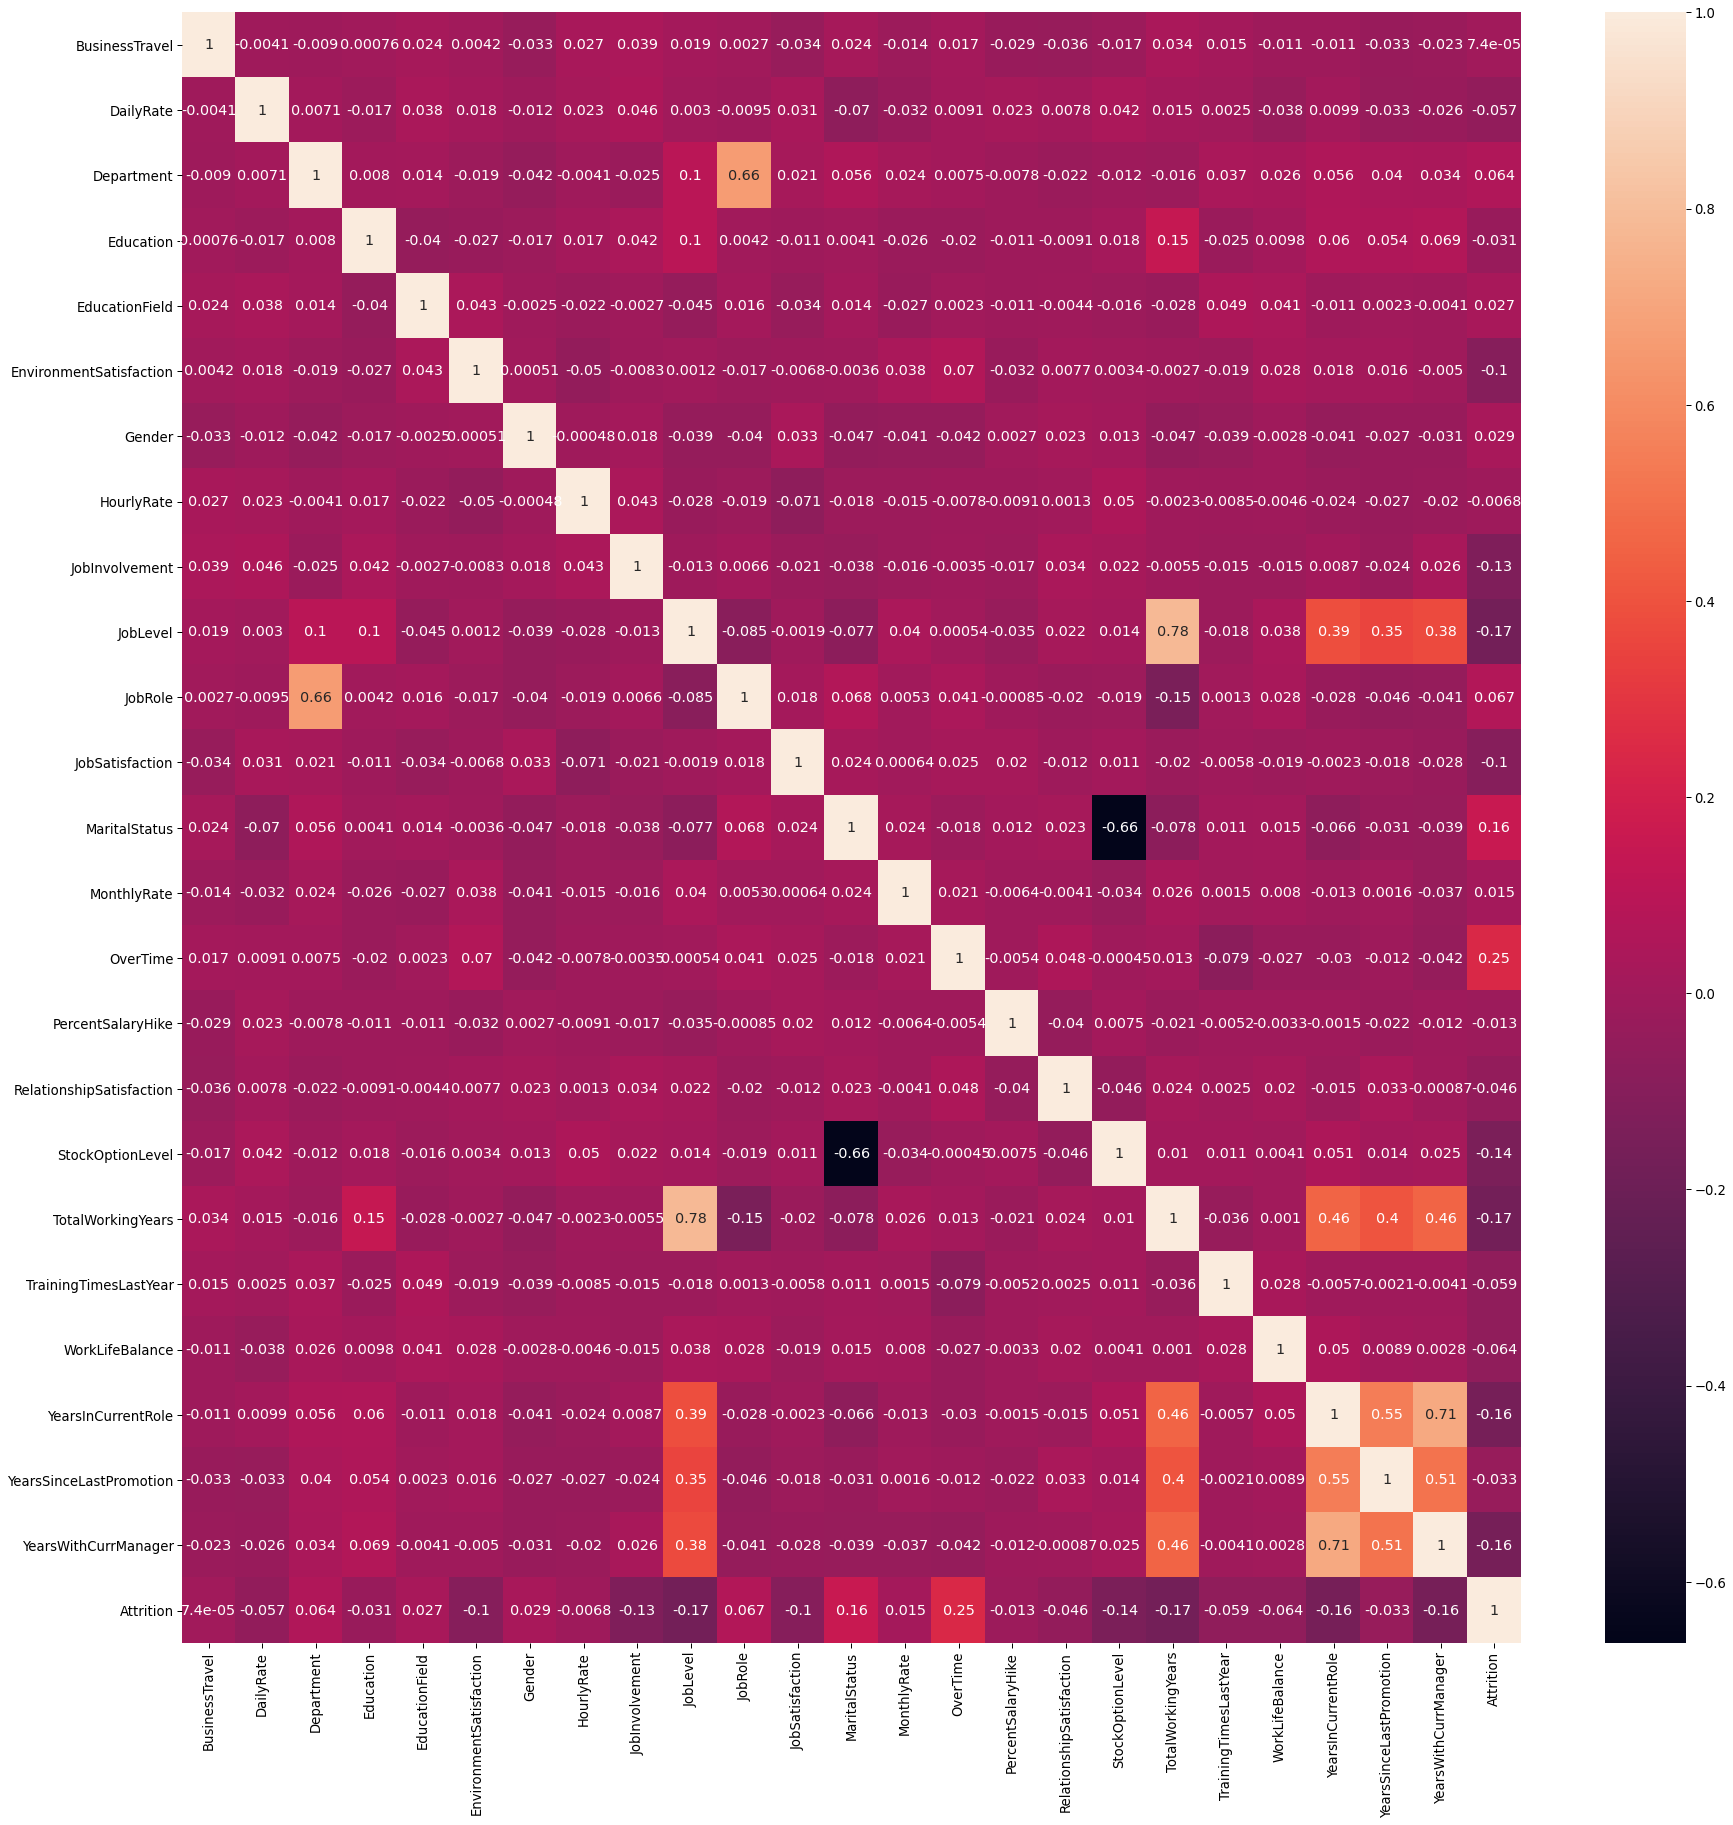

In [47]:
plt.figure(figsize=(30,30))
sns.heatmap(df3.corr(),annot=True)
sns.set_context('paper', font_scale=2.0)

In [48]:
x=df3.iloc[:, :-1]
x.head()

,BusinessTravel,DailyRate,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,1102,2,2,1,2,0,94,3,2,...,1,11,1,0,8,0,1,4,0,5
1,1,279,1,1,1,3,1,61,2,2,...,0,23,4,1,10,3,3,7,1,7
2,2,1373,1,2,4,4,1,92,2,1,...,1,15,2,0,7,3,3,0,0,0
3,1,1392,1,4,1,4,0,56,3,1,...,1,11,3,0,8,3,3,7,3,0
4,2,591,1,1,3,1,1,40,3,1,...,0,12,4,1,6,3,3,2,2,2


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
ss= StandardScaler()
x= ss.fit_transform(x)

In [52]:
y=df3.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [53]:
from sklearn.model_selection import train_test_split,cross_val_score

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=9,stratify=y)

In [55]:
print(x_train.shape,x_test.shape)

(1029, 24) (441, 24)


In [56]:
print(y_train.shape,y_test.shape)

(1029,) (441,)


In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [58]:
KNN = KNeighborsClassifier(n_neighbors=6)
SV=SVC()

In [59]:
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [60]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))




In [61]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [62]:
Model = []
score = []
cvs = []
rocscore =[]
rocscore = []

*********** KNeighborsClassifier ****************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score= 0.8435374149659864


Cross_Val_Score= 0.8448979591836734


roc_auc_score= 0.5140845070422535


classification_report
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       1.00      0.03      0.05        71

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.48       441
weighted avg       0.87      0.84      0.78       441



[[370   0]
 [ 69   2]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)

 
 
*********** SVC ****************


SVC()


Accuracy_score= 0.8503401360544217


Cross_Val_Score= 0.8585034013605443


roc_auc_score= 0.55228397411496


classification_report
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       370
           1       0.73      0.11      0.20        71

    accuracy                       

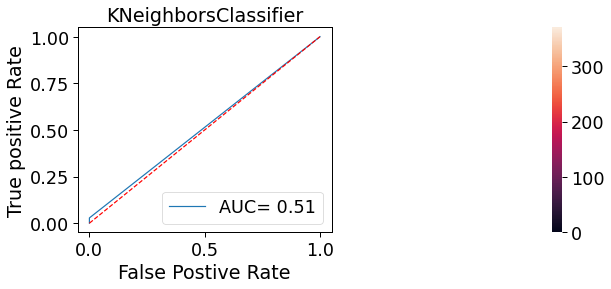

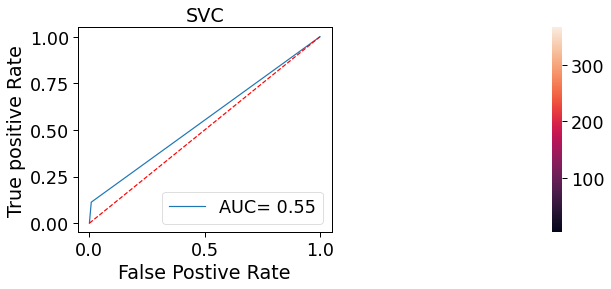

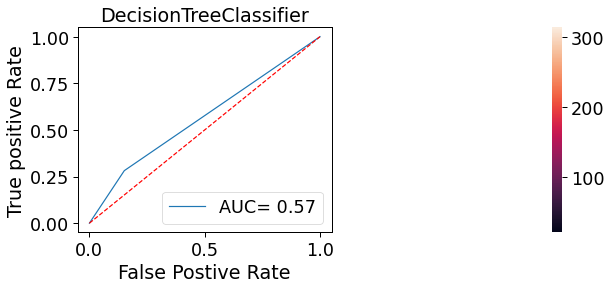

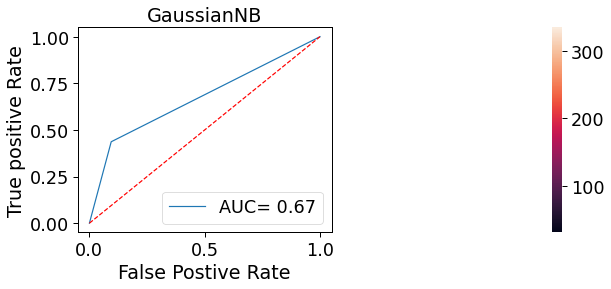

In [63]:
for name,model in models:
    print('***********',name,'****************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x,y, cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds,=roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=', roc_auc)
    rocscore.append(roc_auc *100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(921)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC= %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False Postive Rate')
    print('\n \n ')
    


    

In [64]:
result = pd.DataFrame({'model': model, 'Accuracy_score':score,'Cross_Val_Score':cvs,'roc_auc_score':rocscore})
result

,model,Accuracy_score,Cross_Val_Score,roc_auc_score
0,GaussianNB(),84.353741,84.489796,51.408451
1,GaussianNB(),85.034014,85.850340,55.228397
2,GaussianNB(),75.736961,78.299320,56.516939
3,GaussianNB(),82.993197,83.129252,67.101256


In [65]:
import joblib


In [ ]:
joblib.dump(SV,'data')

In [ ]:
model=joblib.load('data.csv')

In [ ]:
df.columns

In [ ]:
model.predict(x_test)

In [ ]:
`